In [20]:

# laden/bereinigen der daten
import numpy as np
import pandas as pd


In [21]:

trump = pd.read_csv("realdonaldtrump.csv")
elon = pd.read_csv("elonmusk_tweets.csv")


In [22]:
trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [23]:
elon.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [24]:
trump.shape

(43352, 8)

In [25]:
elon.shape

(2819, 3)

In [26]:

# trump-datensatz angleichen:
trump = trump.sample(n=2819)


In [27]:
trump.shape

(2819, 8)

In [28]:

# spalte neu benennen:
trump = trump.rename(columns={"content":"text"})


In [29]:
trump.head()

,id,link,text,date,retweets,favorites,mentions,hashtags
33290,943819430735372289,https://twitter.com/realDonaldTrump/status/943...,"The Massive Tax Cuts, which the Fake News Medi...",2017-12-21 06:24:22,20844,97355,NaN,NaN
40650,1205121293282099201,https://twitter.com/realDonaldTrump/status/120...,True!https://twitter.com/Jim_Jordan/status/120...,2019-12-12 07:44:41,5117,19281,NaN,NaN
20505,559915250888486912,https://twitter.com/realDonaldTrump/status/559...,""" @ BuckyBirt: @13ascot81 @ realDonaldTrump # ...",2015-01-26 21:26:13,22,87,"@BuckyBirt,@13ascot81,@realDonaldTrump",#CelebrityApprentice
1355,168076779037274112,https://twitter.com/realDonaldTrump/status/168...,"“As someone once put it, ‘Marriage is the grea...",2012-02-10 15:00:01,215,102,NaN,#TimeToGetTough
14061,437778166720253952,https://twitter.com/realDonaldTrump/status/437...,"""@_xx_justme: “ @ realDonaldTrump: @ realDonal...",2014-02-23 20:37:03,19,38,"@realDonaldTrump,@realDonaldTrump",NaN


In [34]:

# zusätzliche label-spalte:
trump["label"] = 1
elon["label"] = 0


In [46]:

# daten zusammenführen:
data = pd.merge(elon[["text","label"]],trump[["text","label"]],how="outer",on=["text","label"])


In [48]:
data.shape

(5638, 2)

In [54]:

# falls indices durcheinander, dann neu ordnen --> "data = data.reset_index(drop=True)"
data.head()

,text,label
0,b'And so the robots spared humanity ... https:...,0
1,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0
2,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0
3,b'Stormy weather in Shortville ...',0
4,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",0


In [116]:

# zufälliger wert aus einem sample aus der spalte "text":
def random_tweet():
    sample = data.sample()
    if sample["label"].values[0] == 1:
        print("verfaßt von Donald Trump")
    else:
        print("verfaßt von Elon Musk")


In [117]:
random_tweet()

verfaßt von Donald Trump



# vektorisierung des textes


In [118]:

from sklearn.feature_extraction.text import CountVectorizer


In [119]:

# vector-variable initialisieren --> jedes einzelne wort an bestimmter stelle
vect = CountVectorizer()


In [120]:

# textvariable anlegen:
text = ["Das ist ein beliebiger Text. Aus diesem Text wird ein Vokabular angelegt."]


In [122]:

# dan den text trainieren:
vect.fit(text)


CountVectorizer()

In [123]:

# vokabular --> alphabetisch sortiert:
print(vect.vocabulary_)


{'das': 3, 'ist': 6, 'ein': 5, 'beliebiger': 2, 'text': 7, 'aus': 1, 'diesem': 4, 'wird': 9, 'vokabular': 8, 'angelegt': 0}


In [125]:

# zu einem array umwandeln:
vect.transform(["Diese Anekdote ist von mir verfaßt und nicht von den Woislbuam."]).toarray()


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [126]:

# alle tweets vektorisiert: --> "fit" und "transform" in einem schritt
vect02 = CountVectorizer()


In [128]:

# eigene variable für vektorisierte daten als matrix: --> die richtige form für X
wordsCountArray = vect02.fit_transform(data["text"].values)


In [130]:
wordsCountArray

<5638x14840 sparse matrix of type '<class 'numpy.int64'>'
	with 93783 stored elements in Compressed Sparse Row format>

In [129]:

# y:
labels = data["label"].values


In [131]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)


# trainieren


In [132]:

from sklearn.model_selection import train_test_split


In [133]:

X_train, X_test, y_train, y_test = train_test_split(wordsCountArray, labels, test_size=0.2, random_state=0)



# algorithmus


In [134]:

from sklearn.naive_bayes import MultinomialNB


In [135]:

mnb = MultinomialNB()


In [136]:

mnb.fit(X_train,y_train)


MultinomialNB()

In [137]:

pred01 = mnb.predict(X_test)



# accuracy, etc.


In [138]:

from sklearn.metrics import accuracy_score


In [149]:

print("Genauigkeit:   {:>.3f} %".format(accuracy_score(y_test,pred01)*100))


Genauigkeit:   94.504 %



# vorhersagen


In [173]:

# tweet muss eine liste sein:
def predictTweet(tweet,mnb):
    # vect02 --> vektorisiert den tweet:
    pred = mnb.predict(vect02.transform(tweet))
    return pred[0]


In [183]:

predictTweet(["election campaign"],mnb)


1

In [184]:

# funktion wahrscheinlichkeiten der treffer auf 0(elon) oder 1(trump):
def predictProbabilityForTweet(tweet,mnb):
    return mnb.predict_proba(vect02.transform(tweet))


In [187]:

predictProbabilityForTweet(["to make america great again"],mnb)


array([[0.00154239, 0.99845761]])


# confusion-matrix


In [188]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [189]:

matrix = confusion_matrix(y_test,pred01)


In [190]:

matrix


array([[511,  51],
       [ 11, 555]], dtype=int64)

<Axes: >

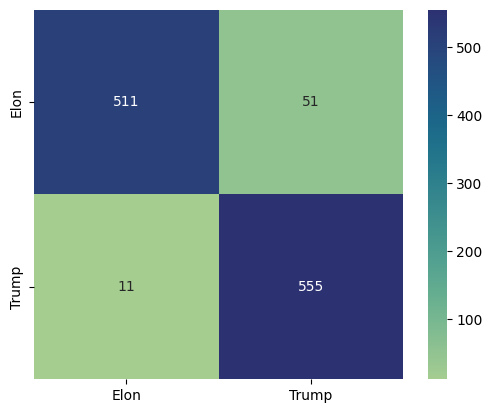

In [197]:

sns.heatmap(matrix,square=True,annot=True,xticklabels=('Elon','Trump'),yticklabels=('Elon','Trump'),fmt="d",cmap="crest")
